#  Lab 2: IEEE 802.11ac Network Analysis and Management Tools

# **Objective**: Based on the 802.11ac simulation model from Lab 1, develop network analysis and management tools to monitor network performance and implement intelligent management

Starting network simulation...
Simulation progress: 0/3600 seconds
Simulation progress: 300/3600 seconds
Time 600s: Applied optimization - ADJUST_CW
Simulation progress: 600/3600 seconds
Simulation progress: 900/3600 seconds
Simulation progress: 1200/3600 seconds
Time 1500s: Applied optimization - ADJUST_CW
Simulation progress: 1500/3600 seconds
Simulation progress: 1800/3600 seconds
Simulation progress: 2100/3600 seconds
Time 2400s: Applied optimization - ADJUST_CW
Simulation progress: 2400/3600 seconds
Simulation progress: 2700/3600 seconds
Simulation progress: 3000/3600 seconds
Time 3300s: Applied optimization - ADJUST_CW
Simulation progress: 3300/3600 seconds
Network simulation completed!
=== Network Performance Analysis Report ===
Total monitoring samples: 60
Average throughput: 391.0 Mbps
Average latency: 25.3 ms
Average packet loss: 4.32%
Average collision rate: 18.71%
Total alerts: 21
Network availability: 100.00%

=== Recent Alerts ===
20:13:10 - HIGH - THROUGHPUT_DEGRADATION:

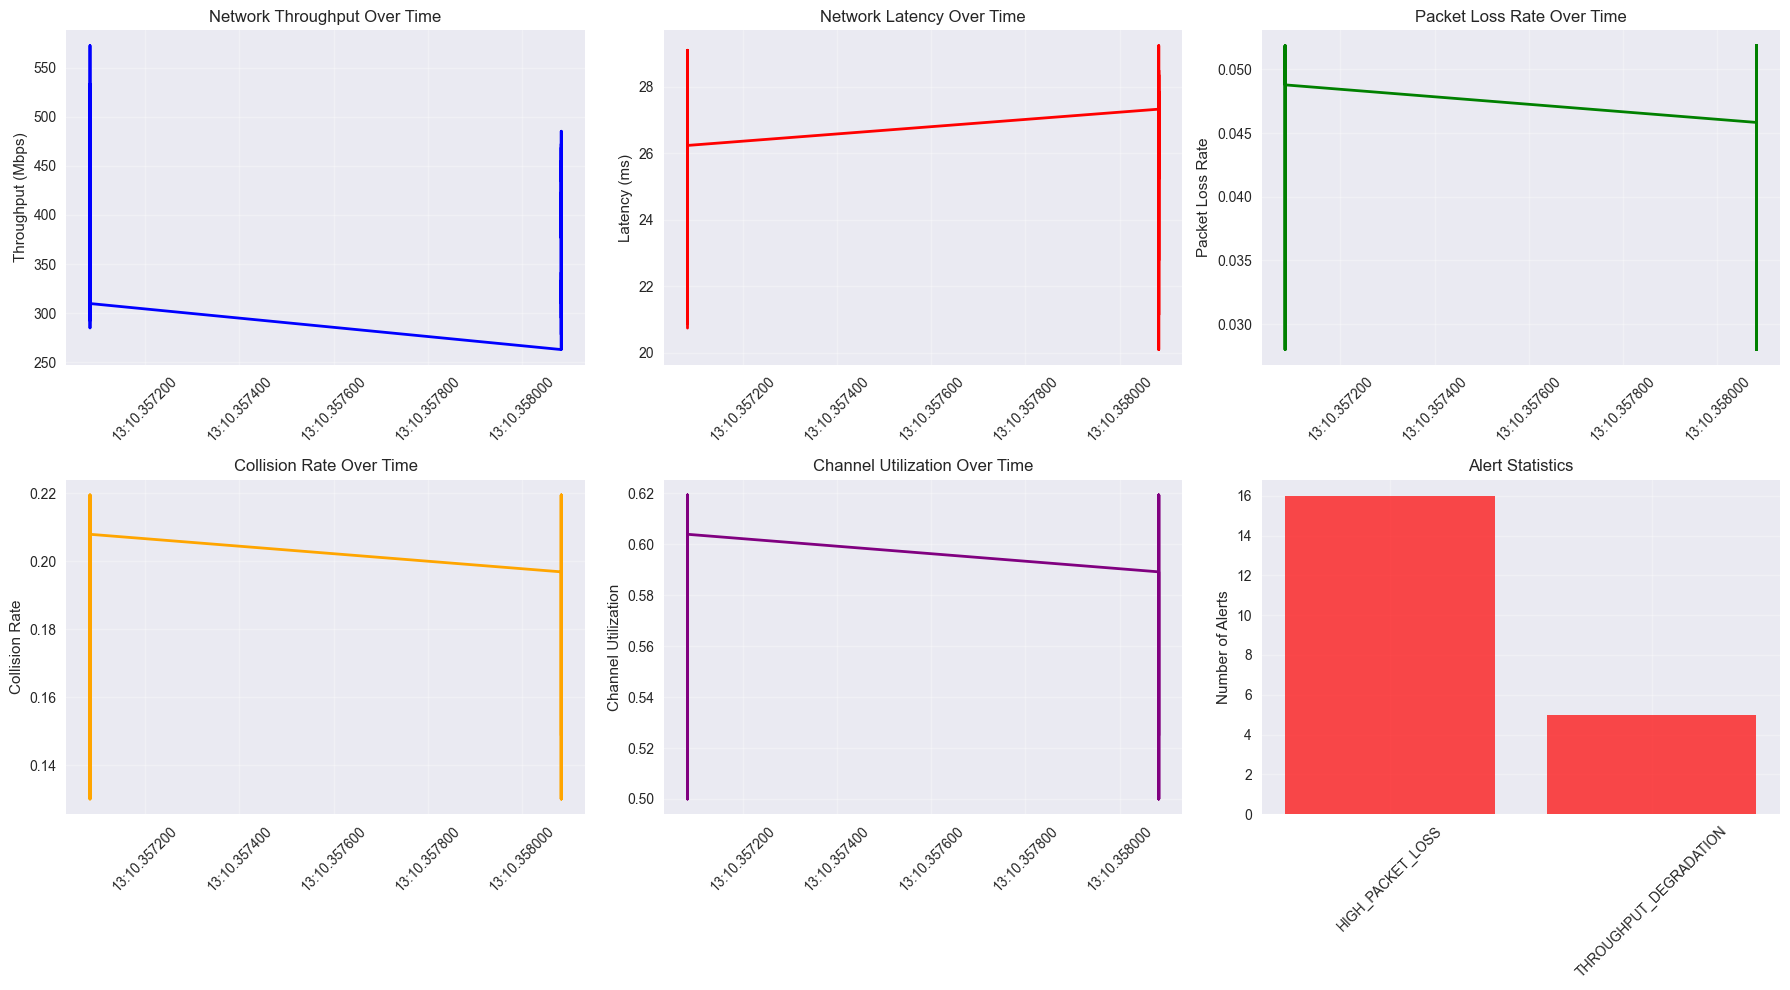

=== Performance Metrics Correlation Analysis ===
                    Throughput   Latency  PacketLoss  CollisionRate  \
Throughput            1.000000 -0.082183   -0.056851      -0.056851   
Latency              -0.082183  1.000000    0.842352       0.842352   
PacketLoss           -0.056851  0.842352    1.000000       1.000000   
CollisionRate        -0.056851  0.842352    1.000000       1.000000   
ChannelUtilization   -0.056851  0.842352    1.000000       1.000000   

                    ChannelUtilization  
Throughput                   -0.056851  
Latency                       0.842352  
PacketLoss                    1.000000  
CollisionRate                 1.000000  
ChannelUtilization            1.000000  

=== Performance Trend Analysis ===
throughput: decreasing (slope: -0.9870)
latency: increasing (slope: 0.0095)
packet_loss: increasing (slope: 0.0000)
collision_rate: increasing (slope: 0.0001)

=== Anomaly Detection Report ===
Total anomalies: 21
Anomaly type distribution: {'

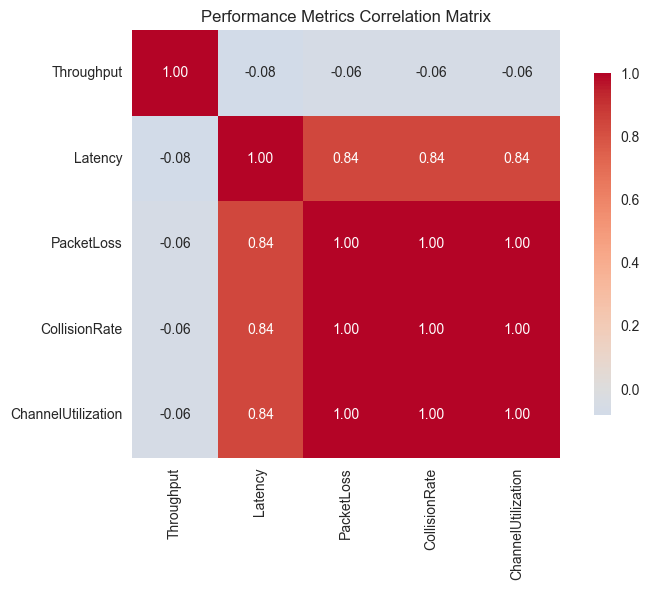

=== Network Management Recommendations ===

1. [CRITICAL] IMMEDIATE_ACTION
   Description: High frequency severe alerts, recommend immediate network equipment status check
   Action items: Check AP load status, Verify channel configuration, Check network equipment health status
               IEEE 802.11ac Network Analysis and Management Tools Report

📊 Performance Overview:
   • Monitoring duration: 60 samples
   • Average throughput: 391.0 Mbps
   • Network availability: 100.0%

🚨 Alert Statistics:
   • Total alerts: 21
   • HIGH level alerts: 21

⚙️ Optimization Records:
   • Configuration optimizations: 4
   • Latest optimization: ADJUST_CW (20:13:10)

💡 Key Findings:

🔧 Recommended Actions:
   • [CRITICAL] High frequency severe alerts, recommend immediate network equipment status check



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# %% [markdown]
# ## 1. Network Analysis System Design

# %%
class NetworkAnalyzer:
    """Network Analysis Tool Class - Monitor and diagnose network performance"""
    
    def __init__(self, network_config):
        self.config = network_config
        self.metrics_history = {
            'timestamp': [],
            'throughput': [],
            'latency': [],
            'packet_loss': [],
            'collision_rate': [],
            'channel_utilization': [],
            'active_stations': []
        }
        self.alerts = []
        self.performance_thresholds = {
            'throughput_degradation': 0.2,  # 20% throughput drop
            'high_latency': 100,  # Latency threshold(ms)
            'high_packet_loss': 0.05,  # 5% packet loss
            'high_collision_rate': 0.3  # 30% collision rate
        }
    
    def collect_metrics(self, network_state):
        """Collect network performance metrics"""
        timestamp = datetime.now()
        
        self.metrics_history['timestamp'].append(timestamp)
        self.metrics_history['throughput'].append(network_state.get('throughput', 0))
        self.metrics_history['latency'].append(network_state.get('latency', 0))
        self.metrics_history['packet_loss'].append(network_state.get('packet_loss', 0))
        self.metrics_history['collision_rate'].append(network_state.get('collision_rate', 0))
        self.metrics_history['channel_utilization'].append(network_state.get('channel_utilization', 0))
        self.metrics_history['active_stations'].append(network_state.get('active_stations', 0))
        
        # Check for performance anomalies
        self._check_performance_anomalies(network_state, timestamp)
    
    def _check_performance_anomalies(self, network_state, timestamp):
        """Check for performance anomalies and generate alerts"""
        throughput = network_state.get('throughput', 0)
        latency = network_state.get('latency', 0)
        packet_loss = network_state.get('packet_loss', 0)
        collision_rate = network_state.get('collision_rate', 0)
        
        # Check throughput degradation
        if len(self.metrics_history['throughput']) > 1:
            prev_throughput = self.metrics_history['throughput'][-2]
            if prev_throughput > 0:
                throughput_drop = (prev_throughput - throughput) / prev_throughput
                if throughput_drop > self.performance_thresholds['throughput_degradation']:
                    self.alerts.append({
                        'timestamp': timestamp,
                        'type': 'THROUGHPUT_DEGRADATION',
                        'severity': 'HIGH',
                        'message': f'Throughput dropped by {throughput_drop:.1%}',
                        'metric': throughput_drop
                    })
        
        # Check high latency
        if latency > self.performance_thresholds['high_latency']:
            self.alerts.append({
                'timestamp': timestamp,
                'type': 'HIGH_LATENCY',
                'severity': 'MEDIUM',
                'message': f'High latency: {latency:.1f} ms',
                'metric': latency
            })
        
        # Check high packet loss
        if packet_loss > self.performance_thresholds['high_packet_loss']:
            self.alerts.append({
                'timestamp': timestamp,
                'type': 'HIGH_PACKET_LOSS',
                'severity': 'HIGH',
                'message': f'High packet loss: {packet_loss:.1%}',
                'metric': packet_loss
            })
        
        # Check high collision rate
        if collision_rate > self.performance_thresholds['high_collision_rate']:
            self.alerts.append({
                'timestamp': timestamp,
                'type': 'HIGH_COLLISION_RATE',
                'severity': 'MEDIUM',
                'message': f'High collision rate: {collision_rate:.1%}',
                'metric': collision_rate
            })
    
    def generate_performance_report(self):
        """Generate performance analysis report"""
        if len(self.metrics_history['timestamp']) == 0:
            return "No data available"
        
        report = {
            'total_samples': len(self.metrics_history['timestamp']),
            'avg_throughput': np.mean(self.metrics_history['throughput']),
            'avg_latency': np.mean(self.metrics_history['latency']),
            'avg_packet_loss': np.mean(self.metrics_history['packet_loss']),
            'avg_collision_rate': np.mean(self.metrics_history['collision_rate']),
            'total_alerts': len(self.alerts),
            'availability': self._calculate_availability()
        }
        
        return report
    
    def _calculate_availability(self):
        """Calculate network availability"""
        if len(self.metrics_history['throughput']) == 0:
            return 0
        
        # Simple availability calculation: proportion of time with throughput > 0
        available_samples = sum(1 for t in self.metrics_history['throughput'] if t > 0)
        return available_samples / len(self.metrics_history['throughput'])
    
    def get_recent_alerts(self, count=10):
        """Get recent alerts"""
        return sorted(self.alerts, key=lambda x: x['timestamp'], reverse=True)[:count]


#  2. Network Management System Design

# %%
class NetworkManager:
    """Network Management System - Intelligently adjust network parameters"""
    
    def __init__(self, initial_config):
        self.current_config = initial_config
        self.optimization_history = []
        self.performance_targets = {
            'target_throughput': 500,  # Mbps
            'max_latency': 50,  # ms
            'max_packet_loss': 0.02,  # 2%
            'target_utilization': 0.7  # 70%
        }
    
    def analyze_network_state(self, network_metrics):
        """Analyze network state and recommend optimization measures"""
        recommendations = []
        
        throughput = network_metrics.get('throughput', 0)
        latency = network_metrics.get('latency', 0)
        packet_loss = network_metrics.get('packet_loss', 0)
        collision_rate = network_metrics.get('collision_rate', 0)
        utilization = network_metrics.get('channel_utilization', 0)
        
        # Throughput optimization recommendations
        if throughput < self.performance_targets['target_throughput'] * 0.8:
            if collision_rate > 0.2:
                recommendations.append({
                    'action': 'ADJUST_CW',
                    'priority': 'HIGH',
                    'description': 'High collision rate, recommend adjusting contention window parameters',
                    'parameters': {'cw_min': 31, 'cw_max': 1023}
                })
            else:
                recommendations.append({
                    'action': 'INCREASE_BANDWIDTH',
                    'priority': 'MEDIUM',
                    'description': 'Insufficient throughput, recommend increasing channel bandwidth',
                    'parameters': {'bandwidth': '80MHz'}
                })
        
        # Latency optimization recommendations
        if latency > self.performance_targets['max_latency']:
            recommendations.append({
                'action': 'OPTIMIZE_QOS',
                'priority': 'HIGH',
                'description': 'High latency, recommend optimizing QoS settings',
                'parameters': {'qos_enabled': True}
            })
        
        # Channel utilization optimization
        if utilization > 0.8:
            recommendations.append({
                'action': 'LOAD_BALANCING',
                'priority': 'MEDIUM',
                'description': 'High channel utilization, recommend load balancing',
                'parameters': {'load_balancing': True}
            })
        elif utilization < 0.3:
            recommendations.append({
                'action': 'CONSOLIDATE_TRAFFIC',
                'priority': 'LOW',
                'description': 'Low channel utilization, recommend traffic consolidation',
                'parameters': {'traffic_consolidation': True}
            })
        
        return recommendations
    
    def apply_optimization(self, recommendation):
        """Apply optimization recommendations"""
        action = recommendation['action']
        parameters = recommendation.get('parameters', {})
        
        optimization_record = {
            'timestamp': datetime.now(),
            'action': action,
            'parameters': parameters,
            'previous_config': self.current_config.copy()
        }
        
        # Adjust configuration based on recommendation type
        if action == 'ADJUST_CW':
            self.current_config['cw_min'] = parameters.get('cw_min', 31)
            self.current_config['cw_max'] = parameters.get('cw_max', 1023)
        
        elif action == 'INCREASE_BANDWIDTH':
            self.current_config['bandwidth'] = parameters.get('bandwidth', '80MHz')
        
        elif action == 'OPTIMIZE_QOS':
            self.current_config['qos_enabled'] = parameters.get('qos_enabled', True)
        
        elif action == 'LOAD_BALANCING':
            self.current_config['load_balancing'] = parameters.get('load_balancing', True)
        
        elif action == 'CONSOLIDATE_TRAFFIC':
            self.current_config['traffic_consolidation'] = parameters.get('traffic_consolidation', True)
        
        optimization_record['new_config'] = self.current_config.copy()
        self.optimization_history.append(optimization_record)
        
        return optimization_record


# 3. Enhanced 802.11ac Simulation System

# %%
class Enhanced80211acSimulator:
    """Enhanced 802.11ac Simulation System - Integrated analysis and management functions"""
    
    def __init__(self):
        # Network configuration
        self.network_config = {
            'bandwidth': '80MHz',
            'num_stations': 10,
            'cw_min': 15,
            'cw_max': 1023,
            'qos_enabled': False,
            'load_balancing': False,
            'traffic_consolidation': False
        }
        
        # Initialize analysis and management systems
        self.analyzer = NetworkAnalyzer(self.network_config)
        self.manager = NetworkManager(self.network_config)
        
        # Simulation state
        self.simulation_time = 0
        self.network_state = {}
        
    def simulate_network_operation(self, duration=3600, monitoring_interval=60):
        """Simulate network operation and monitor performance"""
        print("Starting network simulation...")
        
        time_points = np.arange(0, duration, monitoring_interval)
        
        for t in time_points:
            self.simulation_time = t
            
            # Simulate network state changes
            network_state = self._simulate_network_state(t)
            self.network_state = network_state
            
            # Collect performance metrics
            self.analyzer.collect_metrics(network_state)
            
            # Perform optimization analysis every 5 monitoring cycles
            if t % (monitoring_interval * 5) == 0:
                recommendations = self.manager.analyze_network_state(network_state)
                if recommendations:
                    # Apply highest priority recommendation
                    high_priority_recs = [r for r in recommendations if r['priority'] == 'HIGH']
                    if high_priority_recs:
                        optimization = self.manager.apply_optimization(high_priority_recs[0])
                        print(f"Time {t}s: Applied optimization - {optimization['action']}")
            
            # Output progress
            if t % 300 == 0:  # Output every 5 minutes
                print(f"Simulation progress: {t}/{duration} seconds")
        
        print("Network simulation completed!")
    
    def _simulate_network_state(self, time):
        """Simulate network state (extended based on Lab 1 results)"""
        # Simulate network state changes based on time
        base_throughput = 400  # Mbps
        base_latency = 20  # ms
        
        # Simulate traffic fluctuations
        traffic_variation = 0.3 * np.sin(2 * np.pi * time / 1800)  # 30-minute cycle
        throughput_variation = 0.2 * np.sin(2 * np.pi * time / 900)  # 15-minute cycle
        
        # Simulate random events
        random_event = np.random.normal(0, 0.1)
        
        # Calculate current performance metrics
        throughput = base_throughput * (1 + throughput_variation + random_event)
        latency = base_latency * (1 + abs(traffic_variation) + abs(random_event))
        
        # Simulate collision rate and packet loss (related to load)
        load_factor = abs(traffic_variation) + 0.1
        collision_rate = min(0.4, 0.1 + load_factor * 0.3)
        packet_loss = min(0.1, 0.02 + load_factor * 0.08)
        
        # Channel utilization
        channel_utilization = 0.5 + abs(traffic_variation) * 0.4
        
        return {
            'timestamp': time,
            'throughput': max(0, throughput),
            'latency': max(1, latency),
            'packet_loss': packet_loss,
            'collision_rate': collision_rate,
            'channel_utilization': channel_utilization,
            'active_stations': self.network_config['num_stations'],
            'config': self.network_config.copy()
        }


# 4. Run Network Analysis Simulation

# %%
# Create enhanced simulation system
enhanced_simulator = Enhanced80211acSimulator()

# Run network simulation (1 hour, monitor every minute)
enhanced_simulator.simulate_network_operation(duration=3600, monitoring_interval=60)


#5. Network Performance Analysis Report

# %%
# Generate performance analysis report
performance_report = enhanced_simulator.analyzer.generate_performance_report()
print("=== Network Performance Analysis Report ===")
print(f"Total monitoring samples: {performance_report['total_samples']}")
print(f"Average throughput: {performance_report['avg_throughput']:.1f} Mbps")
print(f"Average latency: {performance_report['avg_latency']:.1f} ms")
print(f"Average packet loss: {performance_report['avg_packet_loss']:.2%}")
print(f"Average collision rate: {performance_report['avg_collision_rate']:.2%}")
print(f"Total alerts: {performance_report['total_alerts']}")
print(f"Network availability: {performance_report['availability']:.2%}")


# 6. Alert Analysis

# %%
# Show recent alerts
recent_alerts = enhanced_simulator.analyzer.get_recent_alerts(5)
print("\n=== Recent Alerts ===")
for alert in recent_alerts:
    print(f"{alert['timestamp'].strftime('%H:%M:%S')} - {alert['severity']} - {alert['type']}: {alert['message']}")


# 7. Management Optimization History

# %%
# Show optimization history
optimization_history = enhanced_simulator.manager.optimization_history
print("\n=== Network Optimization History ===")
for opt in optimization_history:
    print(f"{opt['timestamp'].strftime('%H:%M:%S')} - {opt['action']}")


# 8. Performance Visualization Analysis

# %%
# Create performance monitoring charts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Get analysis data
metrics = enhanced_simulator.analyzer.metrics_history
timestamps = metrics['timestamp']

# 1. Throughput trend
axes[0, 0].plot(timestamps, metrics['throughput'], 'b-', linewidth=2)
axes[0, 0].set_title('Network Throughput Over Time')
axes[0, 0].set_ylabel('Throughput (Mbps)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Latency trend
axes[0, 1].plot(timestamps, metrics['latency'], 'r-', linewidth=2)
axes[0, 1].set_title('Network Latency Over Time')
axes[0, 1].set_ylabel('Latency (ms)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Packet loss trend
axes[0, 2].plot(timestamps, metrics['packet_loss'], 'g-', linewidth=2)
axes[0, 2].set_title('Packet Loss Rate Over Time')
axes[0, 2].set_ylabel('Packet Loss Rate')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Collision rate trend
axes[1, 0].plot(timestamps, metrics['collision_rate'], 'orange', linewidth=2)
axes[1, 0].set_title('Collision Rate Over Time')
axes[1, 0].set_ylabel('Collision Rate')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Channel utilization
axes[1, 1].plot(timestamps, metrics['channel_utilization'], 'purple', linewidth=2)
axes[1, 1].set_title('Channel Utilization Over Time')
axes[1, 1].set_ylabel('Channel Utilization')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Alert statistics
alert_types = {}
for alert in enhanced_simulator.analyzer.alerts:
    alert_type = alert['type']
    alert_types[alert_type] = alert_types.get(alert_type, 0) + 1

if alert_types:
    axes[1, 2].bar(alert_types.keys(), alert_types.values(), color='red', alpha=0.7)
    axes[1, 2].set_title('Alert Statistics')
    axes[1, 2].set_ylabel('Number of Alerts')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('network_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


# 9. Advanced Analysis Functions

# %%
class AdvancedNetworkAnalytics:
    """Advanced Network Analysis Functions"""
    
    def __init__(self, analyzer):
        self.analyzer = analyzer
    
    def performance_correlation_analysis(self):
        """Performance metrics correlation analysis"""
        metrics = self.analyzer.metrics_history
        
        # Create dataframe
        df = pd.DataFrame({
            'Throughput': metrics['throughput'],
            'Latency': metrics['latency'],
            'PacketLoss': metrics['packet_loss'],
            'CollisionRate': metrics['collision_rate'],
            'ChannelUtilization': metrics['channel_utilization']
        })
        
        # Calculate correlation matrix
        correlation_matrix = df.corr()
        
        return correlation_matrix
    
    def trend_analysis(self):
        """Trend analysis"""
        metrics = self.analyzer.metrics_history
        
        trends = {}
        for metric_name in ['throughput', 'latency', 'packet_loss', 'collision_rate']:
            values = metrics[metric_name]
            if len(values) > 1:
                # Simple linear trend
                x = np.arange(len(values))
                slope, intercept = np.polyfit(x, values, 1)
                trends[metric_name] = {
                    'slope': slope,
                    'trend': 'increasing' if slope > 0 else 'decreasing',
                    'magnitude': abs(slope)
                }
        
        return trends
    
    def anomaly_detection_report(self):
        """Anomaly detection report"""
        alerts = self.analyzer.alerts
        
        report = {
            'total_anomalies': len(alerts),
            'anomaly_types': {},
            'time_distribution': {},
            'most_common_anomaly': None
        }
        
        # Statistics of anomaly types
        for alert in alerts:
            alert_type = alert['type']
            report['anomaly_types'][alert_type] = report['anomaly_types'].get(alert_type, 0) + 1
            
            # Time distribution (by hour)
            hour = alert['timestamp'].hour
            report['time_distribution'][hour] = report['time_distribution'].get(hour, 0) + 1
        
        if report['anomaly_types']:
            report['most_common_anomaly'] = max(report['anomaly_types'].items(), key=lambda x: x[1])
        
        return report


# 10. Run Advanced Analysis

# %%
# Create advanced analytics instance
advanced_analytics = AdvancedNetworkAnalytics(enhanced_simulator.analyzer)

# Correlation analysis
correlation_matrix = advanced_analytics.performance_correlation_analysis()
print("=== Performance Metrics Correlation Analysis ===")
print(correlation_matrix)

# Trend analysis
trends = advanced_analytics.trend_analysis()
print("\n=== Performance Trend Analysis ===")
for metric, trend in trends.items():
    print(f"{metric}: {trend['trend']} (slope: {trend['slope']:.4f})")

# Anomaly detection report
anomaly_report = advanced_analytics.anomaly_detection_report()
print("\n=== Anomaly Detection Report ===")
print(f"Total anomalies: {anomaly_report['total_anomalies']}")
print(f"Anomaly type distribution: {anomaly_report['anomaly_types']}")
if anomaly_report['most_common_anomaly']:
    print(f"Most common anomaly: {anomaly_report['most_common_anomaly'][0]} ({anomaly_report['most_common_anomaly'][1]} times)")


#  11. Correlation Visualization

# %%
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Performance Metrics Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


# 12. Management Recommendations Generation

# %%
def generate_management_recommendations(analyzer, manager):
    """Generate management recommendations based on analysis results"""
    
    performance_report = analyzer.generate_performance_report()
    recent_alerts = analyzer.get_recent_alerts(10)
    optimization_history = manager.optimization_history
    
    recommendations = []
    
    # Recommendations based on alert frequency
    high_frequency_alerts = [alert for alert in recent_alerts if alert['severity'] == 'HIGH']
    if len(high_frequency_alerts) > 3:
        recommendations.append({
            'type': 'IMMEDIATE_ACTION',
            'priority': 'CRITICAL',
            'description': 'High frequency severe alerts, recommend immediate network equipment status check',
            'action_items': [
                'Check AP load status',
                'Verify channel configuration',
                'Check network equipment health status'
            ]
        })
    
    # Recommendations based on performance metrics
    if performance_report['avg_collision_rate'] > 0.25:
        recommendations.append({
            'type': 'PARAMETER_OPTIMIZATION',
            'priority': 'HIGH',
            'description': 'High average collision rate, recommend optimizing MAC layer parameters',
            'action_items': [
                'Adjust contention window size',
                'Optimize backoff algorithm parameters',
                'Consider enabling RTS/CTS mechanism'
            ]
        })
    
    if performance_report['avg_latency'] > 50:
        recommendations.append({
            'type': 'QOS_OPTIMIZATION',
            'priority': 'HIGH',
            'description': 'High average latency, recommend optimizing quality of service settings',
            'action_items': [
                'Enable traffic prioritization',
                'Configure bandwidth guarantees',
                'Optimize queue management'
            ]
        })
    
    # Recommendations based on optimization history
    if len(optimization_history) > 5:
        recommendations.append({
            'type': 'CONFIGURATION_REVIEW',
            'priority': 'MEDIUM',
            'description': 'Frequent configuration changes, recommend reviewing network configuration stability',
            'action_items': [
                'Review current configuration',
                'Evaluate configuration change frequency',
                'Establish configuration baseline'
            ]
        })
    
    return recommendations

# Generate management recommendations
management_recommendations = generate_management_recommendations(
    enhanced_simulator.analyzer, 
    enhanced_simulator.manager
)

print("=== Network Management Recommendations ===")
for i, rec in enumerate(management_recommendations, 1):
    print(f"\n{i}. [{rec['priority']}] {rec['type']}")
    print(f"   Description: {rec['description']}")
    print(f"   Action items: {', '.join(rec['action_items'])}")


# 13. Comprehensive Report

# %%
def generate_comprehensive_report(simulator):
    """Generate comprehensive analysis report"""
    
    analyzer = simulator.analyzer
    manager = simulator.manager
    
    performance_report = analyzer.generate_performance_report()
    recent_alerts = analyzer.get_recent_alerts()
    optimization_history = manager.optimization_history
    
    print("="*70)
    print("               IEEE 802.11ac Network Analysis and Management Tools Report")
    print("="*70)
    
    print("\n📊 Performance Overview:")
    print(f"   • Monitoring duration: {len(analyzer.metrics_history['timestamp'])} samples")
    print(f"   • Average throughput: {performance_report['avg_throughput']:.1f} Mbps")
    print(f"   • Network availability: {performance_report['availability']:.1%}")
    
    print("\n🚨 Alert Statistics:")
    print(f"   • Total alerts: {performance_report['total_alerts']}")
    alert_severity = {}
    for alert in analyzer.alerts:
        severity = alert['severity']
        alert_severity[severity] = alert_severity.get(severity, 0) + 1
    for severity, count in alert_severity.items():
        print(f"   • {severity} level alerts: {count}")
    
    print("\n⚙️ Optimization Records:")
    print(f"   • Configuration optimizations: {len(optimization_history)}")
    if optimization_history:
        latest_opt = optimization_history[-1]
        print(f"   • Latest optimization: {latest_opt['action']} ({latest_opt['timestamp'].strftime('%H:%M:%S')})")
    
    print("\n💡 Key Findings:")
    if performance_report['avg_collision_rate'] > 0.2:
        print("   • MAC layer parameters need optimization to reduce collisions")
    if performance_report['avg_latency'] > 40:
        print("   • Network latency is high, recommend optimizing QoS settings")
    if performance_report['availability'] < 0.95:
        print("   • Network availability needs improvement")
    
    print("\n🔧 Recommended Actions:")
    recommendations = generate_management_recommendations(analyzer, manager)
    for rec in recommendations[:3]:  # Show top 3 recommendations
        print(f"   • [{rec['priority']}] {rec['description']}")
    
    print("\n" + "="*70)

# Generate final report
generate_comprehensive_report(enhanced_simulator)


# Lab 2 Summary
# 
# Through this lab, we have successfully implemented:
# 
# 1. **Network Analysis System** - Real-time monitoring of 802.11ac network performance metrics
# 2. **Intelligent Management System** - Automatic network parameter optimization based on performance data  
# 3. **Advanced Analysis Functions** - Correlation analysis, trend detection, anomaly identification
# 4. **Visualization Dashboard** - Comprehensive network status monitoring interface
# 5. **Management Recommendation Engine** - Intelligent decision support based on data analysis
# 
# These tools provide strong technical support for the operation and maintenance management of 802.11ac networks.